# Niharika Gorain (Data Science and Business Analytics Task)
# Intern at The Spark Foundation

## Prediction using Unsupervised ML (Task-2)

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
#loading dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [143]:
df=df.drop('Id',axis=1)  #removing column ID

In [144]:
df.shape

(150, 5)

In [145]:
#making species column more accurate by creating new column New_species
df['New_Species'] = df['Species'].apply(lambda x: (x.split('-')[1]))
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,New_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [146]:
df=df.drop('Species',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,New_Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [147]:
df['New_Species'].unique() # Displaying the different species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [148]:
df.describe() # some calculated info of table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

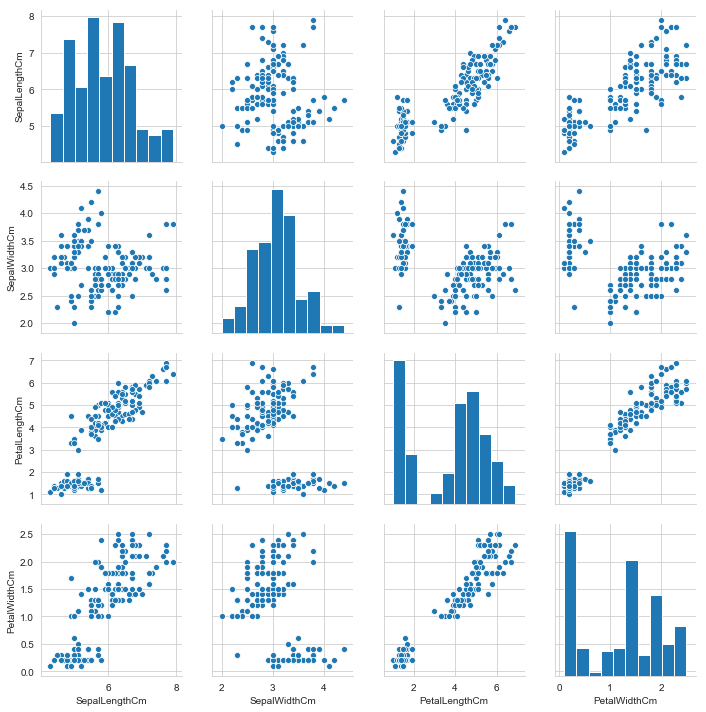

In [149]:
sns.pairplot(df)

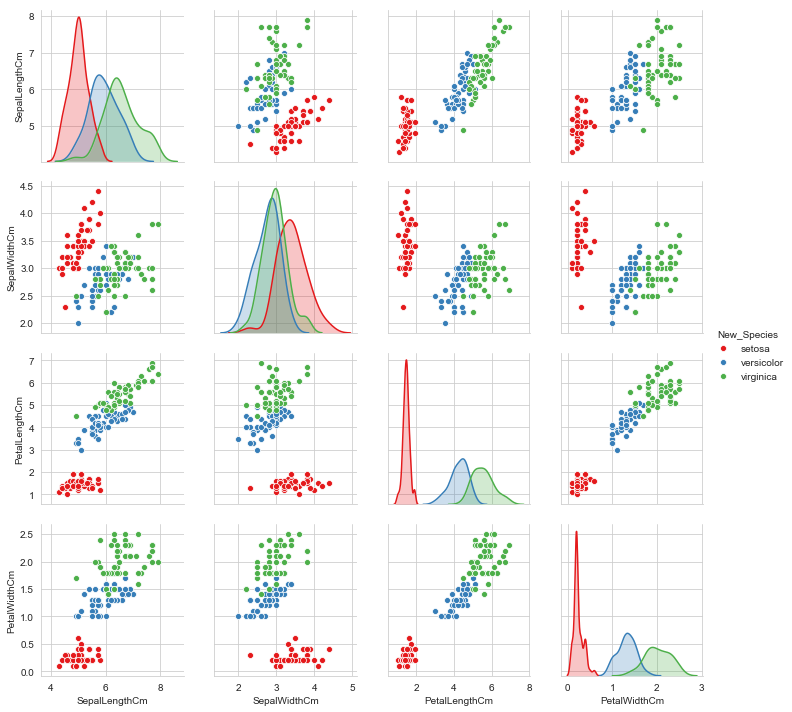

In [151]:
sns.pairplot(df,hue='New_Species',palette='Set1')

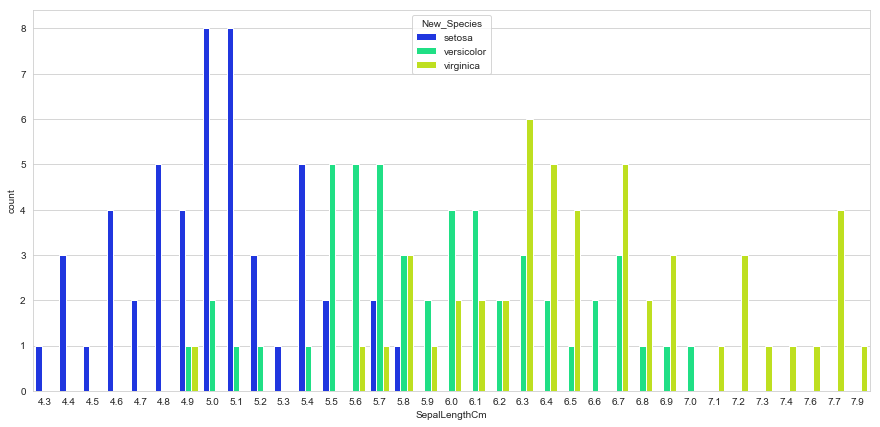

In [154]:
plt.figure(figsize=(15,7))
sns.countplot(x='SepalLengthCm',data=df,hue='New_Species',palette='gist_rainbow_r')

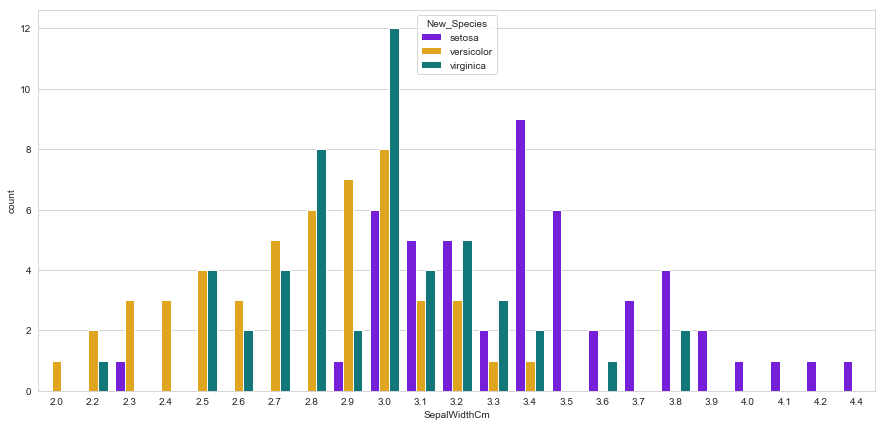

In [157]:
plt.figure(figsize=(15,7))
sns.countplot(x='SepalWidthCm',data=df,hue='New_Species',palette='prism_r')

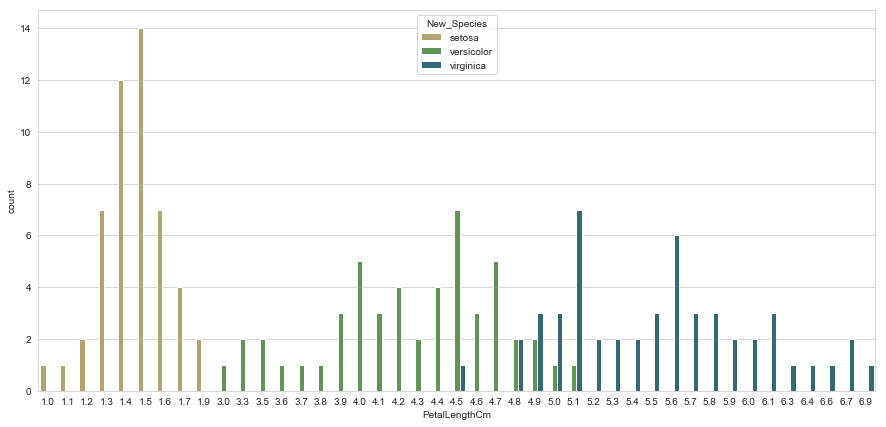

In [164]:
plt.figure(figsize=(15,7))
sns.countplot(x='PetalLengthCm',data=df,hue='New_Species',palette='gist_earth_r')

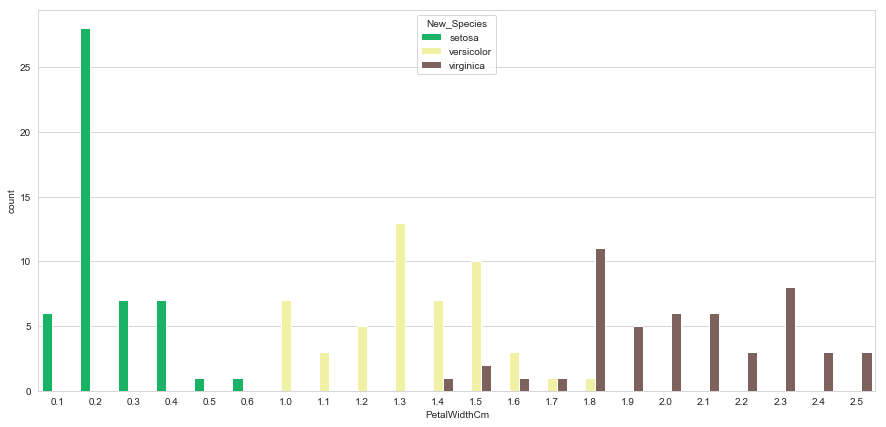

In [160]:
plt.figure(figsize=(15,7))
sns.countplot(x='PetalWidthCm',data=df,hue='New_Species',palette='terrain')

Text(0, 0.5, 'Secies')

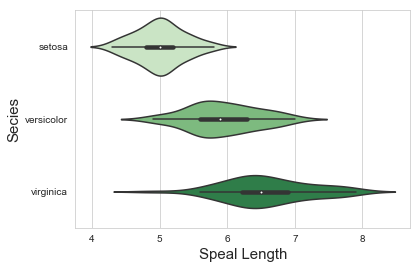

In [165]:
sns.violinplot(x="SepalLengthCm", y="New_Species", data=df,palette='Greens')
plt.xlabel('Speal Length', fontsize=15)
plt.ylabel('Secies', fontsize=15)

Text(0, 0.5, 'Species')

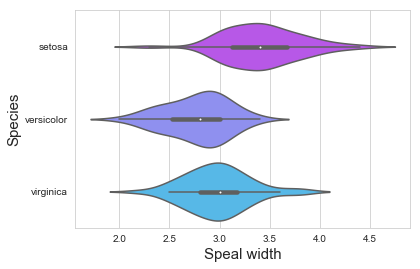

In [166]:
sns.violinplot(x="SepalWidthCm", y="New_Species", data=df,palette='cool_r')
plt.xlabel('Speal width', fontsize=15)
plt.ylabel('Species', fontsize=15)

Text(0, 0.5, 'Species')

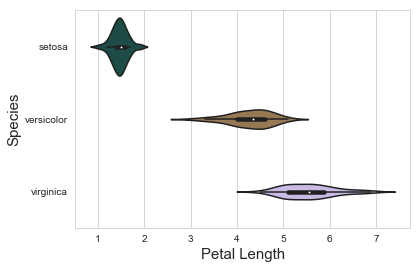

In [167]:
sns.violinplot(x="PetalLengthCm", y="New_Species", data=df,palette='cubehelix')
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Species', fontsize=15)

Text(0, 0.5, 'Species')

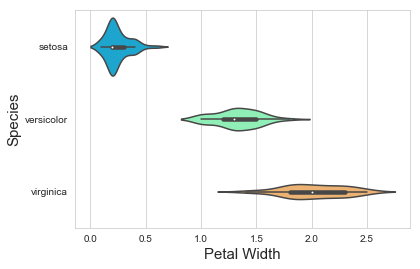

In [168]:
sns.violinplot(x="PetalWidthCm", y="New_Species", data=df,palette='rainbow')
plt.xlabel('Petal Width', fontsize=15)
plt.ylabel('Species', fontsize=15)

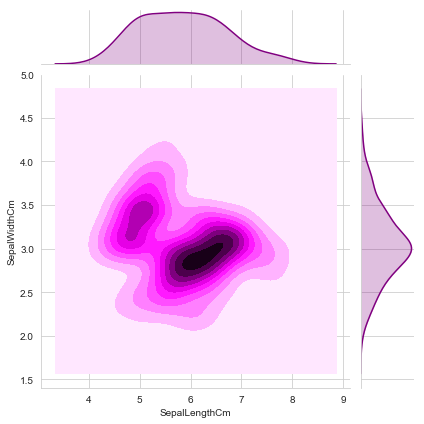

In [169]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='kde',color='purple')

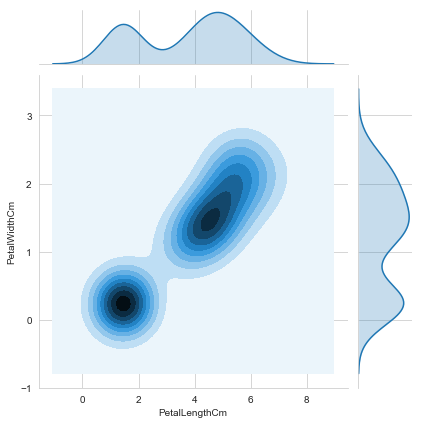

In [170]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df,kind='kde')

## Finding the optimum number of clusters for k-means classification

 Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. although we already know the answer is 3 it is still interesting to run.

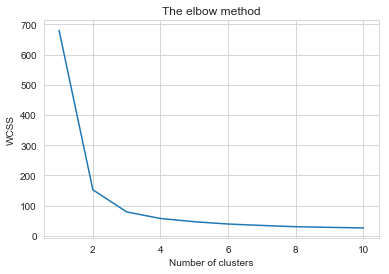

In [171]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [172]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


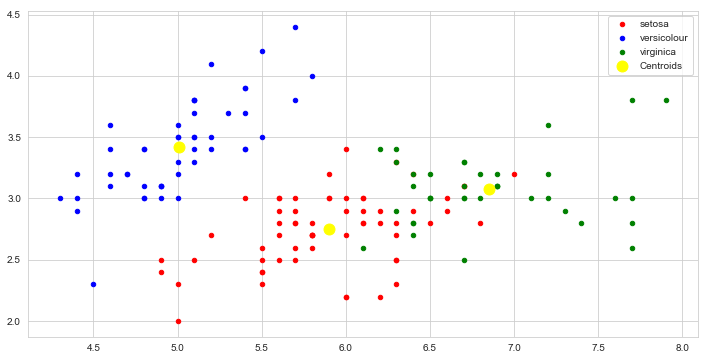

In [173]:
#Visualising the clusters
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 120, c = 'yellow', label = 'Centroids')

plt.legend()